In [13]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import re

%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col='id', encoding="ISO-8859-1")
test = pd.read_csv('./data/test.csv', index_col='id', encoding="ISO-8859-1")

products_description = pd.read_csv('./data/product_descriptions.csv')
prod_attributes = pd.read_csv('./data/attributes.csv')

In [3]:
attributes = prod_attributes[prod_attributes.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

In [4]:
# merge datasets
train_merged = pd.merge(train, products_description, how='left', on='product_uid')
test_merged = pd.merge(test, products_description, how='left', on='product_uid')

In [5]:
import nltk

In [6]:
search_terms_text = ' '.join(train_merged.search_term)
search_terms = search_terms_text.split()

In [7]:
search_terms_freq = nltk.FreqDist(search_terms)

In [10]:
search_terms_freq.most_common(350)

[(u'door', 2643),
 (u'light', 1976),
 (u'for', 1803),
 (u'in', 1657),
 (u'inch', 1485),
 (u'wall', 1423),
 (u'shower', 1421),
 (u'with', 1416),
 (u'white', 1351),
 (u'wood', 1317),
 (u'x', 1302),
 (u'tile', 1288),
 (u'and', 1156),
 (u'paint', 1112),
 (u'cabinet', 1061),
 (u'outdoor', 1033),
 (u'water', 1015),
 (u'vanity', 956),
 (u'kitchen', 949),
 (u'bathroom', 946),
 (u'doors', 941),
 (u'gas', 916),
 (u'lights', 840),
 (u'air', 821),
 (u'led', 802),
 (u'sink', 786),
 (u'2', 780),
 (u'1/2', 772),
 (u'ceiling', 772),
 (u'faucet', 766),
 (u'kit', 760),
 (u'4', 733),
 (u'floor', 728),
 (u'saw', 714),
 (u'pipe', 712),
 (u'black', 709),
 (u'steel', 699),
 (u'fan', 696),
 (u'window', 684),
 (u'lighting', 668),
 (u'electric', 664),
 (u'1', 637),
 (u'glass', 622),
 (u'metal', 603),
 (u'heater', 596),
 (u'3', 588),
 (u'toilet', 580),
 (u'wire', 568),
 (u'6', 564),
 (u'pvc', 564),
 (u'12', 560),
 (u'patio', 548),
 (u'fence', 538),
 (u'cover', 531),
 (u'drill', 527),
 (u'plastic', 521),
 (u'tub'

In [66]:
title_freq = nltk.FreqDist(train_merged.product_title)

In [67]:
title_freq.most_common(100)

[(u'Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)',
  21),
 (u'Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light',
  21),
 (u'2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud', 18),
 (u'Ryobi ONE+ 18-Volt Lithium-Ion Ultimate Combo Kit (6-Tool)', 17),
 (u'Ryobi ONE+ 18-Volt Lithium-Ion Cordless Drill/Driver and Impact Driver Kit (2-Tool)',
  17),
 (u'Custom Building Products VersaBond Gray 50 lb. Fortified Thin-Set Mortar',
  17),
 (u'Whirlpool Gold Series Top Control Dishwasher in Monochromatic Stainless Steel with Silverware Spray',
  15),
 (u'WeatherShield 2 in. x 4 in. x 8 ft. #2 Prime Prime Pressure-Treated Lumber',
  14),
 (u'23/32 in. x 4 ft. x 8 ft. RTD Sheathing Syp', 14),
 (u'Oriented Strand Board (Common: 7/16 in. x 4 ft. x 8 ft.; Actual: 0.418 in. x 47.75 in. x 95.75 in.)',
  14),
 (u'Ryobi ONE+ 18-Volt Lithium-Ion Cordless Super Combo Kit (4-Piece)', 14),
 (u'Owens

In [46]:
def transform(matchobj):
    matched_group = matchobj.group(0)
    uppercase_index = re.search(r'[A-Z]', matched_group).start()
    return matched_group[:uppercase_index] + '. ' + matched_group[uppercase_index:]

In [71]:
text = 'Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.'
re.sub(r'[^\w\s\d]', ' ', text)

'Pressure Treated Timber  2 Southern Yellow Pine  Common  4 in  x 4 in  x 8 ft   Actual  3 56 in  x 3 56 in  x 96 in '

In [45]:
re.findall(r"[\'][a-z]", processed_text)

["n't", "t's", "n's", "t's"]

In [37]:
example

'Team spirit by the gallon. With the officially licensed colors from your favorite teams, you can turn any room into your dream "Fan Cave". Don\'t worry about your paint\'s defense either. Glidden\'s DUO formula is more than just a paint. It also primes with every single roll, saving you time and energy. Better yet, Glidden DUO Paint and Primer is a great value. You only have to purchase one product to get a quality primer plus a premium paint. Glidden DUO Paint and Primer is available in three sheens and 282 interior colors and is especially effective as a bathroom paint. Get going on your project today to experience beautiful, long-lasting results, guaranteed.California residents: see&nbsp;Proposition 65 informationExceptional hiding power for great coverage in fewer coats, even over darker colorsExcellent adhesion to most new or previously painted surfacesStain-blocking primer combined with stain-resistant paintMildew-resistant coating that\'s great for bathroomsEasy cleaning to kee

In [21]:
prod_attributes.name.value_counts()

MFG Brand Name                          86250
Bullet02                                86248
Bullet03                                86226
Bullet04                                86174
Bullet01                                85940
Product Width (in.)                     61137
Bullet05                                60529
Product Height (in.)                    54698
Product Depth (in.)                     53652
Product Weight (lb.)                    45175
Bullet06                                44901
Color Family                            41508
Bullet07                                34349
Material                                31500
Color/Finish                            28564
Bullet08                                26645
Certifications and Listings             24583
Bullet09                                20567
Assembled Height (in.)                  18299
Assembled Width (in.)                   18263
Assembled Depth (in.)                   18198
Product Length (in.)              

In [95]:
dimensions_regex = r'[0-9]+[ |a-z]*x[ |a-z]*[0-9]+[ |a-z]*(?:x[ |a-z]*[0-9]+)?'

In [98]:
re.findall(dimensions_regex, 'This drum is of the size 9in. x4 x 6 and 4 x 6 x5')

['4 x 6 and ', '4 x 6 x']

In [74]:
width = prod_attributes[prod_attributes.name == "Product Width (in.)"][["product_uid", "value"]].rename(columns={"value": "width"})

In [75]:
color = prod_attributes[prod_attributes.name == "Color Family"][["product_uid", "value"]].rename(columns={"value": "color"})

In [76]:
train_merged  = pd.merge(train_merged, width, on='product_uid', how='left')

In [77]:
train_merged = pd.merge(train_merged, color, on='product_uid', how='left')

In [78]:
train_merged = pd.merge(train_merged, attributes, on='product_uid', how='left')

In [79]:
train_merged.head()

,product_uid,product_title,search_term,relevance,product_description,width,color,brand
0,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",3,NaN,Simpson Strong-Tie
1,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",3,NaN,Simpson Strong-Tie
2,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,NaN,Browns / Tans,BEHR Premium Textured DeckOver
3,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,7.09,Chrome,Delta
4,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,7.09,Chrome,Delta


In [81]:
def has_digit(text):
    return int(any(char.isdigit() for char in text))

train_merged['has_digit'] = train_merged.search_term.map(has_digit)

In [82]:
train_merged['search_term_len'] = train_merged.search_term.map(lambda x: len(x.split()))

In [83]:
def num_expressive_terms(text):
    return len([word for word in text.split() if len(word) >= 6])

train_merged['num_expressive_words'] = train_merged.search_term.map(num_expressive_terms)

In [89]:
def num_dimension_matches(text):
    return len(re.findall(dimensions_regex, text))

train_merged['has_dimension'] = train_merged.search_term.map(num_dimension_matches)

In [90]:
train_merged['has_dimension_title'] = train_merged.product_title.map(num_dimension_matches)

In [91]:
train_merged['has_dimension_desc'] = train_merged.product_description.map(num_dimension_matches)

In [94]:
train_merged['has_dimension'].describe()

count    74495.000000
mean         0.036029
std          0.186364
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: has_dimension, dtype: float64

In [87]:
def has_color(color):
    return int(pd.isnull(color))

train_merged['has_color'] = train_merged.color.map(has_color)

In [86]:
def is_unbranded(brand):
    return brand == 'Unbranded'

train_merged['is_unbranded'] = train_merged.brand.map(is_unbranded)

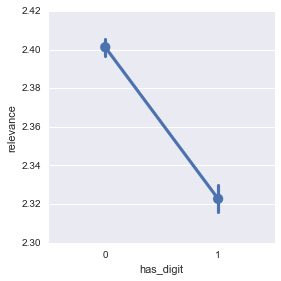

In [87]:
sns.factorplot(x='has_digit', y='relevance', data=train_merged);

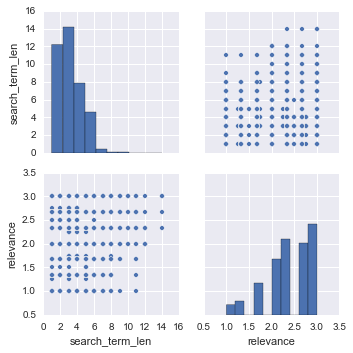

In [59]:
sns.pairplot(train_merged, vars=['search_term_len', 'relevance']);

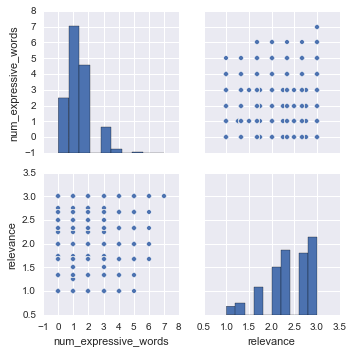

In [62]:
sns.pairplot(train_merged, vars=['num_expressive_words', 'relevance']);

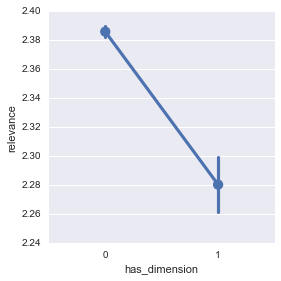

In [92]:
sns.factorplot(x='has_dimension', y='relevance', data=train_merged);

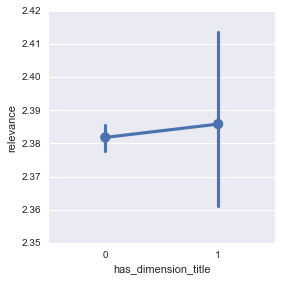

In [88]:
sns.factorplot(x='has_dimension_title', y='relevance', data=train_merged);

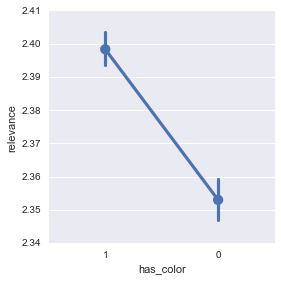

In [88]:
sns.factorplot(x='has_color', y='relevance', data=train_merged);

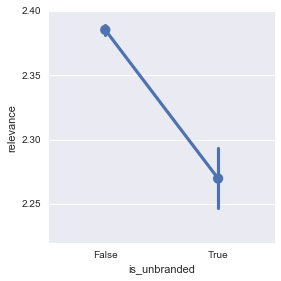

In [93]:
sns.factorplot(x='is_unbranded', y='relevance', data=train_merged);